In [2]:
import sys
# run sys.path at Python evnv first, and add the paths to append
sys.path.append(['C:\\Users\\sli\\Groupe BPCE\\Transversal Risk - General\\03. ERM\\02. Stress Test\\03. Climate ST\\Physical Risk\\code',
 'C:\\ProgramData\\Anaconda3\\python37.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\sli\\.ipython'])

In [9]:
#pip install pandas_datareader
#pip install scikit-learn
#pip install seaborn

In [138]:
pip install ta

Looking in indexes: https://artifactory.mycloud.intranatixis.com/artifactory/api/pypi/python/simple, https://artifactory.mycloud.intranatixis.com/artifactory/api/pypi/python-repo-myc/simple
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for ta: started
  Running setup.py install for ta: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: ta is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\sli\venv\Scripts\python.exe -m pip install --upgrade pip


In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ta.momentum import RSIIndicator
from ta.trend import MACD

from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel, RFE, f_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix


from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline


In [2]:
# Load Excel data into a pandas DataFrame
df = pd.read_csv('^HSCE.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-30,11822.870117,11859.940430,11722.780273,11769.160156,11769.160156,2914306300
1,2018-05-31,11878.259766,11999.820313,11835.120117,11978.299805,11978.299805,4712361100
2,2018-06-01,12018.299805,12072.080078,11941.389648,12020.089844,12020.089844,3579175100
3,2018-06-04,12137.570313,12278.169922,12104.450195,12249.580078,12249.580078,2419163400
4,2018-06-05,12225.990234,12296.559570,12169.839844,12259.320313,12259.320313,2036479900
...,...,...,...,...,...,...,...
1226,2023-05-22,6609.930176,6739.709961,6581.560059,6693.640137,6693.640137,1684714800
1227,2023-05-23,6721.709961,6753.330078,6579.120117,6603.569824,6603.569824,1922438800
1228,2023-05-24,6545.439941,6557.629883,6448.939941,6478.080078,6478.080078,2557072200
1229,2023-05-25,6413.410156,6423.890137,6289.220215,6333.629883,6333.629883,2813693200


In [107]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,log_returen,momentum,...,EMA_10,EMA_15,log_return,target,past_return_1,past_return_2,past_return_3,past_return_4,past_return_6,past_return_7
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1.109000e+03,1109.000000,1109.000000,1109.000000,1109.000000,...,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000
mean,9293.553657,9364.286202,9210.396589,9287.839766,9287.839766,2.541887e+09,5.713891,153.889614,-0.000463,-35.211587,...,9303.960966,9312.492368,-0.000463,0.409378,-0.000455,-0.000433,-0.000429,-0.000413,-0.000395,-0.000412
std,1745.294711,1740.463795,1745.747963,1742.889101,1742.889101,1.055785e+09,104.920065,72.744870,0.016473,421.596374,...,1722.661021,1713.028345,0.016473,0.491941,0.016469,0.016456,0.016453,0.016449,0.016440,0.016437
min,5005.740234,5104.479980,4919.029785,4938.560059,4938.560059,0.000000e+00,-644.050782,42.080078,-0.075838,-2168.430665,...,5256.826603,5348.651883,-0.075838,0.000000,-0.075838,-0.075838,-0.075838,-0.075838,-0.075838,-0.075838
25%,7529.339844,7586.240234,7427.129883,7528.140137,7528.140137,1.885452e+09,-58.710938,106.740235,-0.009321,-301.580078,...,7460.459082,7449.397678,-0.009321,0.000000,-0.009305,-0.009298,-0.009298,-0.009218,-0.009114,-0.009114
50%,9925.709961,10006.570313,9835.290039,9936.660156,9936.660156,2.339069e+09,5.279297,139.580078,-0.000495,-37.770020,...,9941.332634,9914.638093,-0.000495,0.000000,-0.000495,-0.000446,-0.000446,-0.000336,-0.000306,-0.000336
75%,10649.110352,10705.629883,10577.900391,10641.400391,10641.400391,2.974306e+09,69.740234,182.790039,0.008235,246.290039,...,10632.847277,10647.560173,0.008235,1.000000,0.008235,0.008235,0.008235,0.008235,0.008235,0.008136
max,12268.240234,12271.599609,12030.330078,12228.629883,12228.629883,8.024571e+09,458.359375,703.969726,0.117786,1389.060059,...,11902.192349,11828.121284,0.117786,1.000000,0.117786,0.117786,0.117786,0.117786,0.117786,0.117786


In [109]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,log_returen,momentum,...,EMA_10,EMA_15,log_return,target,past_return_1,past_return_2,past_return_3,past_return_4,past_return_6,past_return_7
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1.109000e+03,1109.000000,1109.000000,1109.000000,1109.000000,...,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000
mean,9293.553657,9364.286202,9210.396589,9287.839766,9287.839766,2.541887e+09,5.713891,153.889614,-0.000463,-35.211587,...,9303.960966,9312.492368,-0.000463,0.409378,-0.000455,-0.000433,-0.000429,-0.000413,-0.000395,-0.000412
std,1745.294711,1740.463795,1745.747963,1742.889101,1742.889101,1.055785e+09,104.920065,72.744870,0.016473,421.596374,...,1722.661021,1713.028345,0.016473,0.491941,0.016469,0.016456,0.016453,0.016449,0.016440,0.016437
min,5005.740234,5104.479980,4919.029785,4938.560059,4938.560059,0.000000e+00,-644.050782,42.080078,-0.075838,-2168.430665,...,5256.826603,5348.651883,-0.075838,0.000000,-0.075838,-0.075838,-0.075838,-0.075838,-0.075838,-0.075838
25%,7529.339844,7586.240234,7427.129883,7528.140137,7528.140137,1.885452e+09,-58.710938,106.740235,-0.009321,-301.580078,...,7460.459082,7449.397678,-0.009321,0.000000,-0.009305,-0.009298,-0.009298,-0.009218,-0.009114,-0.009114
50%,9925.709961,10006.570313,9835.290039,9936.660156,9936.660156,2.339069e+09,5.279297,139.580078,-0.000495,-37.770020,...,9941.332634,9914.638093,-0.000495,0.000000,-0.000495,-0.000446,-0.000446,-0.000336,-0.000306,-0.000336
75%,10649.110352,10705.629883,10577.900391,10641.400391,10641.400391,2.974306e+09,69.740234,182.790039,0.008235,246.290039,...,10632.847277,10647.560173,0.008235,1.000000,0.008235,0.008235,0.008235,0.008235,0.008235,0.008136
max,12268.240234,12271.599609,12030.330078,12228.629883,12228.629883,8.024571e+09,458.359375,703.969726,0.117786,1389.060059,...,11902.192349,11828.121284,0.117786,1.000000,0.117786,0.117786,0.117786,0.117786,0.117786,0.117786


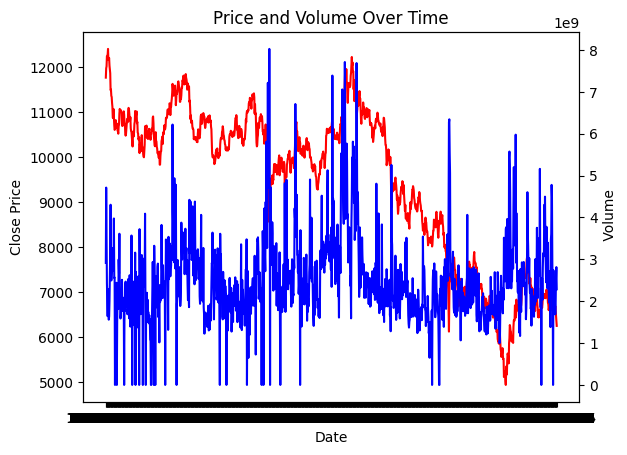

In [3]:
import matplotlib.dates as mdates
# Create the plot
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(df['Date'], df['Adj Close'],label='Close Price',color='red')
ax1.plot(df['Date'], df['Volume'],label='Volume',color='blue')

# Set the date format for the X-axis tick labels
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)

# Set the plot title and axis labels
ax.set_title('Price and Volume Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax1.set_ylabel(' Volume')

# Show the plot
plt.show()

In [119]:
data=df['Volume']
# Calculate median and interquartile range
median = data.median()
iqr = np.percentile(data, 85) - np.percentile(data, 25)

# Define threshold for outliers
threshold = 1.5

# Identify outliers
lower_bound = median - threshold * iqr
upper_bound = median + threshold * iqr
outliers = data[(data < lower_bound) | (data > upper_bound)]

In [120]:
outliers

123              0
124              0
131              0
135              0
162              0
           ...    
1150    4602401600
1184    5159969300
1188             0
1216    4777468400
1220             0
Name: Volume, Length: 76, dtype: int64

In [128]:
df = df.drop(outliers.index)

In [129]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,log_returen,...,EMA_10,EMA_15,log_return,target,past_return_1,past_return_2,past_return_3,past_return_4,past_return_6,past_return_7
122,2018-11-23,10407.480469,10428.339844,10322.690430,10388.530273,10388.530273,1054338100,18.950196,105.649414,-0.005558,...,10479.001739,10474.421065,-0.005558,0,-0.003787,0.001905,-0.015694,0.004515,0.014344,-0.007044
125,2018-11-28,10529.410156,10644.969727,10499.440430,10634.709961,10634.709961,1660614500,-105.299805,145.529297,0.011292,...,10517.888312,10503.436788,0.011292,1,-0.000592,0.012721,-0.005558,-0.003787,-0.015694,0.004515
126,2018-11-29,10724.309570,10736.809570,10545.959961,10584.929688,10584.929688,1641685600,139.379882,190.849609,-0.004692,...,10530.077653,10513.623400,-0.004692,0,0.011292,-0.000592,0.012721,-0.005558,0.001905,-0.015694
127,2018-11-30,10605.860352,10674.129883,10571.849609,10621.740234,10621.740234,2313635900,-15.879882,102.280274,0.003472,...,10546.743577,10527.138004,0.003472,1,-0.004692,0.011292,-0.000592,0.012721,-0.003787,0.001905
128,2018-12-03,10945.669922,10951.830078,10844.990234,10882.160156,10882.160156,2936934600,63.509766,106.839844,0.024222,...,10607.728410,10571.515773,0.024222,1,0.003472,-0.004692,0.011292,-0.000592,-0.005558,-0.003787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2023-05-22,6609.930176,6739.709961,6581.560059,6693.640137,6693.640137,1684714800,-83.709961,158.149902,0.015010,...,6697.478872,6711.122651,0.015010,1,-0.018279,0.011818,-0.022749,0.001369,-0.004725,0.001776
1227,2023-05-23,6721.709961,6753.330078,6579.120117,6603.569824,6603.569824,1922438800,118.140137,174.209961,-0.013547,...,6680.404500,6697.678547,-0.013547,0,0.015010,-0.018279,0.011818,-0.022749,0.017337,-0.004725
1228,2023-05-24,6545.439941,6557.629883,6448.939941,6478.080078,6478.080078,2557072200,67.359863,108.689942,-0.019186,...,6643.618241,6670.228739,-0.019186,0,-0.013547,0.015010,-0.018279,0.011818,0.001369,0.017337
1229,2023-05-25,6413.410156,6423.890137,6289.220215,6333.629883,6333.629883,2813693200,79.780273,134.669922,-0.022551,...,6587.256722,6628.153882,-0.022551,0,-0.019186,-0.013547,0.015010,-0.018279,-0.022749,0.001369


In [112]:
# Create the plot
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(df['Date'], df['Adj Close'],label='Close Price',color='red')
ax1.plot(df['Date'], df['Volume'],label='Volume',color='blue')

# Set the date format for the X-axis tick labels
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)

# Set the plot title and axis labels
ax.set_title('Price and Volume Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax1.set_ylabel(' Volume')

# Show the plot
plt.show()

122     1054338100
123              0
124              0
125     1660614500
126     1641685600
           ...    
1226    1684714800
1227    1922438800
1228    2557072200
1229    2813693200
1230    2284342600
Name: Volume, Length: 1109, dtype: int64

### Features

In [4]:
df['Open_Close'] = df['Open'] - df['Adj Close']
df['High_Low'] = df['High'] - df['Low']

df['log_return'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))
df['momentum'] = df['Adj Close'] - df['Adj Close'].shift(10)

df['past_return_1'] = df['log_return'].shift(1)
df['past_return_2'] = df['log_return'].shift(2)
df['past_return_3'] = df['log_return'].shift(3)
df['past_return_4'] = df['log_return'].shift(4)
df['past_return_5'] = df['log_return'].shift(5)
df['past_return_6'] = df['log_return'].shift(6)
df['past_return_7'] = df['log_return'].shift(7)
df['past_return_10'] = df['log_return'].shift(10)
df['past_return_15'] = df['log_return'].shift(15)

df['MA_5'] = df['Adj Close'].rolling(window=5).mean()
df['MA_10'] = df['Adj Close'].rolling(window=10).mean()
df['MA_15'] = df['Adj Close'].rolling(window=15).mean()

df['EMA_5'] = df['Adj Close'].ewm(span=5, adjust=False).mean()
df['EMA_10'] = df['Adj Close'].ewm(span=10, adjust=False).mean()
df['EMA_15'] = df['Adj Close'].ewm(span=15, adjust=False).mean()

# Calculate RSI and MACD
rsi = RSIIndicator(df['Adj Close']).rsi()
macd = MACD(df['Adj Close']).macd()

# Add RSI and MACD as features
df['RSI'] = rsi
df['MACD'] = macd

df.dropna(inplace=True)

In [5]:
# features as input x  
# label return > 0.25% as 1, others as 0
X = df[['RSI','MACD','Open_Close','High_Low','Volume','past_return_1','past_return_2','past_return_3','past_return_4','past_return_6', 'past_return_5','past_return_7', 'past_return_10', 'past_return_15', 'momentum', 'MA_5', 'MA_10', 'MA_15', 'EMA_5', 'EMA_10', 'EMA_15']]
y = np.where(df['log_return'] > 0.0025, 1, 0)

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature selection using RFE
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rfc, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]

# Train Random Forest Classifier on selected features
rfc.fit(X_train[selected_features], y_train)
y_pred = rfc.predict(X_test[selected_features])

# Print classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.787292817679558
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       212
           1       0.77      0.69      0.73       150

    accuracy                           0.79       362
   macro avg       0.78      0.77      0.78       362
weighted avg       0.79      0.79      0.79       362

[[182  30]
 [ 47 103]]


In [ ]:
svm = SVC(kernel='linear', probability=True)
selector = SelectKBest(f_classif, k=10)
pipeline = Pipeline([('selector', selector), ('svm', svm)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print('ROC AUC:', roc_auc)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)
cr = classification_report(y_test, y_pred)
print('Classification Report:', cr)

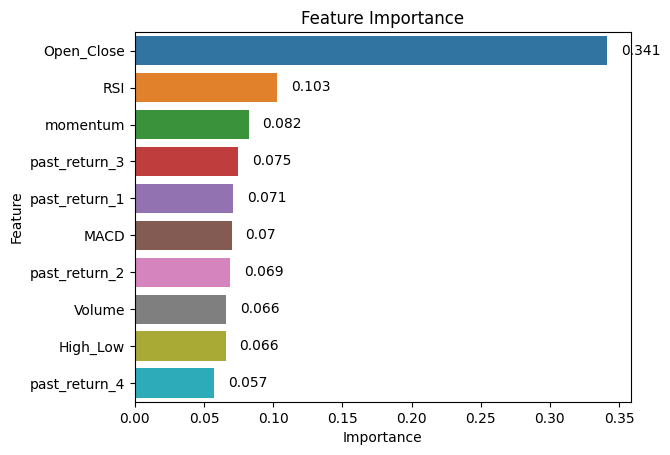

In [167]:
# Rank feature importance
importance = pd.DataFrame({'Feature': selected_features, 'Importance': rfc.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance')
# Add importance values to the bar chart
for i, v in enumerate(importance['Importance']):
    plt.text(v + 0.01, i + 0.1, str(round(v, 3)), color='black')
plt.show()

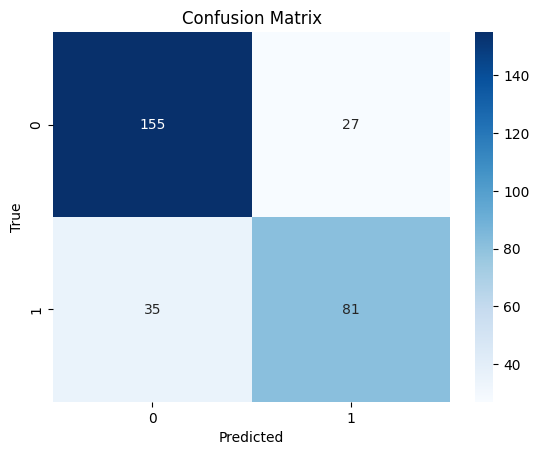

In [168]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

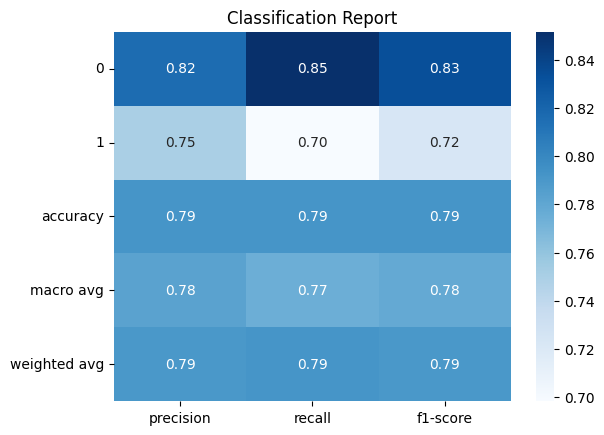

In [169]:
# Plot classification report
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report')
plt.show()

In [159]:
# Use Lasso regularization for feature selection
clf = LogisticRegression(penalty='l1', solver='liblinear', random_state=0, max_iter=1000).fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

# Split data into training and testing sets
split = int(len(X_new) * 0.7)
X_train = X_new[:split]
X_test = X_new[split:]
y_train = y[:split]
y_test = y[split:]

# Fit logistic regression model and make predictions
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8422818791946308


C:\Users\sli\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\sli\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [163]:
X_train

,RSI,MACD,Open_Close,High_Low,Volume,past_return_1,past_return_2,past_return_3,past_return_4,past_return_6,...,past_return_7,past_return_10,past_return_15,momentum,MA_5,MA_10,MA_15,EMA_5,EMA_10,EMA_15
1173,45.301819,-102.103198,-23.959961,90.299805,1989117100,0.049334,-0.013395,-0.004969,-0.023078,-0.013419,...,-0.019855,0.010180,0.017161,-232.750000,6745.328125,6839.963037,6925.918717,6809.445073,6857.868761,6919.360128
793,37.762123,-206.068198,109.299805,172.630860,1785184400,-0.009305,-0.008696,0.005140,0.019690,-0.002464,...,-0.013125,0.011134,-0.016883,-71.359375,9431.159961,9377.937891,9346.081901,9370.674147,9403.849582,9462.952058
1161,47.202815,60.526021,56.959961,65.419921,1416676900,0.002559,-0.025977,0.017161,-0.005958,-0.027121,...,-0.015950,-0.045893,0.003642,-314.500000,7176.816015,7275.891015,7364.033333,7174.949122,7241.035174,7258.787008
600,59.388217,71.949587,-85.120117,182.790039,3017904900,0.013480,0.017904,-0.019804,-0.000793,-0.012171,...,0.003999,0.001019,0.026764,110.830078,9964.566015,10007.783984,9976.152018,10014.013986,9976.760832,9939.251620
746,47.096956,-3.046330,65.850586,150.709961,1714281800,-0.005330,-0.001955,-0.011485,-0.003547,0.008815,...,-0.005731,-0.005732,0.006263,88.119140,10812.395898,10838.360937,10768.567969,10786.968783,10790.280114,10779.767182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,56.695879,29.924252,-57.679687,103.910156,1890519600,-0.005858,-0.001622,0.002445,0.004684,0.007641,...,0.004804,-0.001677,0.012101,14.310547,10849.275976,10789.647949,10832.697266,10845.449081,10827.148052,10812.312885
459,43.828351,-300.670018,-72.009766,183.529296,3313657000,0.016843,-0.003729,0.012844,-0.019979,-0.010869,...,0.006053,-0.029459,0.017589,-306.450195,9584.373828,9594.175781,9885.804557,9666.020832,9730.183937,9851.948011
1088,28.569713,-281.997475,-70.870117,190.740234,2596427500,0.012789,-0.075838,0.000932,-0.015390,0.021614,...,0.000698,-0.006507,0.060904,-474.879883,5308.413965,5471.949951,5618.829297,5302.808807,5450.245735,5570.189381
633,47.337612,22.110156,40.099610,85.950195,2544899400,-0.005934,0.007981,0.005977,-0.004180,0.003525,...,-0.006946,-0.014346,0.008265,-71.490235,10458.472070,10450.161035,10494.625391,10454.775008,10471.706201,10481.219566
